# 배상비용최소화

- 배상 비용은 각 선박의 완성까지 남은 일의 작업량을 제곱하여 모두 더한 값

- 조선소에서 작업할 수 있는 N시간
- 각 일에 대한 작업량이 담긴 배열(works)
- 배상 비용을 최소화한 결과를 반환하는 함수를 만들라 

제한사항

- 일할 수 있는 시간 N : 1,000,000 이하의 자연수
- 배열 works의 크기 : 1,000 이하의 자연수
- 각 일에 대한 작업량 : 1,000 이하의 자연수

###  최대힙 구하기

In [46]:
works = [4,3,3]
# max heap
works = [-i for i in works]
heapq.heapify(works)

In [25]:
# reduce 사용법
from functools import reduce

In [17]:
func = lambda acc, curr: acc + curr**2

In [21]:
result = reduce(func, [1,2,3])

In [22]:
result

14

#### 리스트에 있는 값들의 모든 조합 구하기

- from itertools import product
- from itertools import permutations
- from itertools import combinations


- 하나의 리스트에서 모든 조합을 계산을 해야 한다면, permutations, combinations을 사용
- 두개 이상의 리스트에서 모든 조합을 계산해야 한다면, product를 사용

In [28]:
from itertools import permutations

items = ['1', '2', '3', '4', '5'] 
print(list(permutations(items, 2)))

[('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '1'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '1'), ('3', '2'), ('3', '4'), ('3', '5'), ('4', '1'), ('4', '2'), ('4', '3'), ('4', '5'), ('5', '1'), ('5', '2'), ('5', '3'), ('5', '4')]


In [ ]:
from itertools import permutations

items = ['1', '2', '3', '4', '5'] 
print(list(permutations(items, 2)))

In [29]:
from itertools import combinations

items = ['1', '2', '3', '4', '5'] 
print(list(combinations(items, 2)))

[('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')]


In [33]:
from itertools import product 
items = [['a', 'b', 'c,'], ['1', '2', '3', '4'], ['!', '@', '#']] 
print(list(product(*items)))

[('a', '1', '!'), ('a', '1', '@'), ('a', '1', '#'), ('a', '2', '!'), ('a', '2', '@'), ('a', '2', '#'), ('a', '3', '!'), ('a', '3', '@'), ('a', '3', '#'), ('a', '4', '!'), ('a', '4', '@'), ('a', '4', '#'), ('b', '1', '!'), ('b', '1', '@'), ('b', '1', '#'), ('b', '2', '!'), ('b', '2', '@'), ('b', '2', '#'), ('b', '3', '!'), ('b', '3', '@'), ('b', '3', '#'), ('b', '4', '!'), ('b', '4', '@'), ('b', '4', '#'), ('c,', '1', '!'), ('c,', '1', '@'), ('c,', '1', '#'), ('c,', '2', '!'), ('c,', '2', '@'), ('c,', '2', '#'), ('c,', '3', '!'), ('c,', '3', '@'), ('c,', '3', '#'), ('c,', '4', '!'), ('c,', '4', '@'), ('c,', '4', '#')]


### 자연수 분할 문제

In [75]:
import heapq

no = 4
works = [4,3,3]

def solution(no, works):
    
    if no > sum(works):
        return
    
    # max heap
    works = [(-i, i) for i in works]
    heapq.heapify(works)
    
    for _ in range(no):
        max_val = heapq.heappop(works)[1]
        max_val -= 1
        heapq.heappush(works, (-max_val, max_val))
    
    return sum([work[1]**2 for work in works])

In [76]:
solution(4, [4,3,3])

12

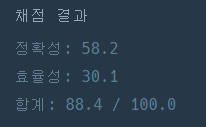

- 자연수 분할을 해야하는지? 
    - NO
    - 자연수 N을 K개로 나누는 경우의 수는 P(N,K)이다


- 이 문제의 경우 최대힙을 구성해서 최대값을 N이 0이 되기 전까지 최대값을 빼주고 최대힙을 재구성하는 방식으로 로직을 진행한다.
    - heap에서 가장 큰 값을 N이 0이 될 때까지 계속 빼는 방법


- MAX_HEAP 구성을 위해 튜플을 굳이 사용하지 않고 음수로 바꾼뒤에 결국 제곱을 해서 값을 계산하므로 부호가 바뀐 최대값에 +1을 해주는 방식으로 진행

In [77]:
import heapq
from functools import reduce

def solution(no, works):
    
    if no > sum(works):
        return 0
    
    works = [-work for work in works]
    heapq.heapify(works)
        
    for _ in range(no):
        max_work = heapq.heappop(works)
        heapq.heappush(works, max_work+1)
        
    # sum([work ** 2 for work in works])        
    result = reduce(lambda acc, cur: acc + cur **2, works, 0) # 초기값 설정 중요
    return result

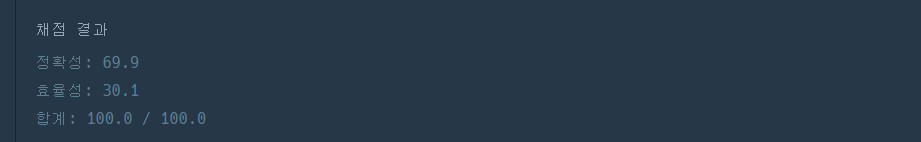